In [1]:
#FPGA Ergebnis
from scipy.io import wavfile
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator

data_fpga = np.int16(np.loadtxt('/Users/dave/Documents/FM-Demodulator/UART/output_data.txt'))
data_uf = np.int16(np.loadtxt('/Users/dave/Documents/FM-Demodulator/Python/demod.txt'))

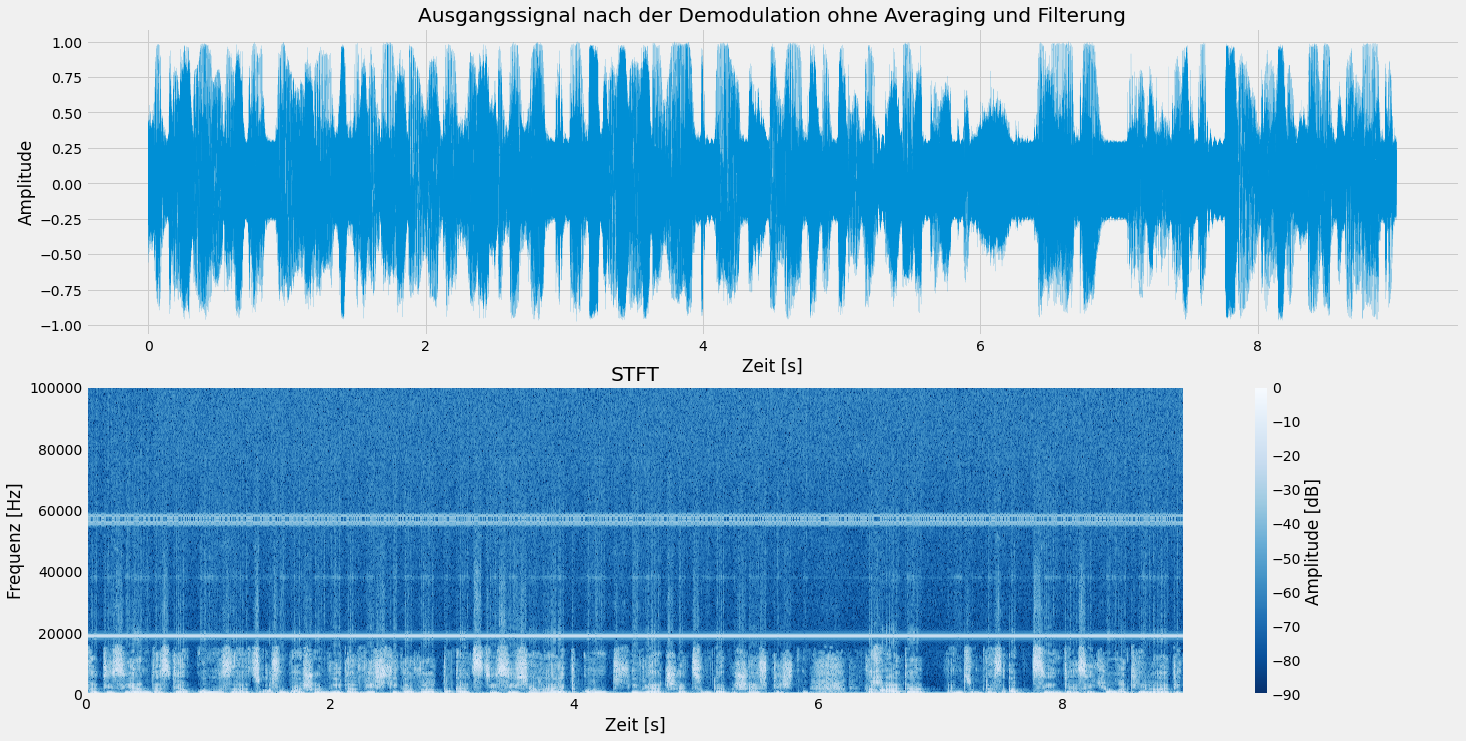

In [2]:
#Plot unfiltered output
f, t, Zxx = signal.stft(data_uf/data_uf.max(), fs=200000, nperseg=512)
plt.style.use('fivethirtyeight')
fig, [ax1, ax2] = plt.subplots(nrows = 2, figsize=(20,10))
fig.tight_layout(h_pad=2)
pc = ax2.pcolormesh(t, f, 20*np.log10(np.abs(Zxx)), vmin = -90, vmax = 0, cmap = 'Blues_r', shading='auto')
cbar = plt.colorbar(pc)
cbar.set_label('Amplitude [dB]')
ax2.set_title('STFT')
ax2.set_ylabel('Frequenz [Hz]')
ax2.set_xlabel('Zeit [s]')

ax1.plot(np.arange(len(data_uf))/200000,np.int16(data_uf)/data_uf.max(), lw = '0.1')
ax1.set_title('Ausgangssignal nach der Demodulation ohne Averaging und Filterung')
ax1.set_ylabel('Amplitude')
ax1.set_xlabel('Zeit [s]')
plt.savefig('/Users/dave/Documents/FM-Demodulator/Figures/Unfiltered_Output.png',bbox_inches = 'tight')



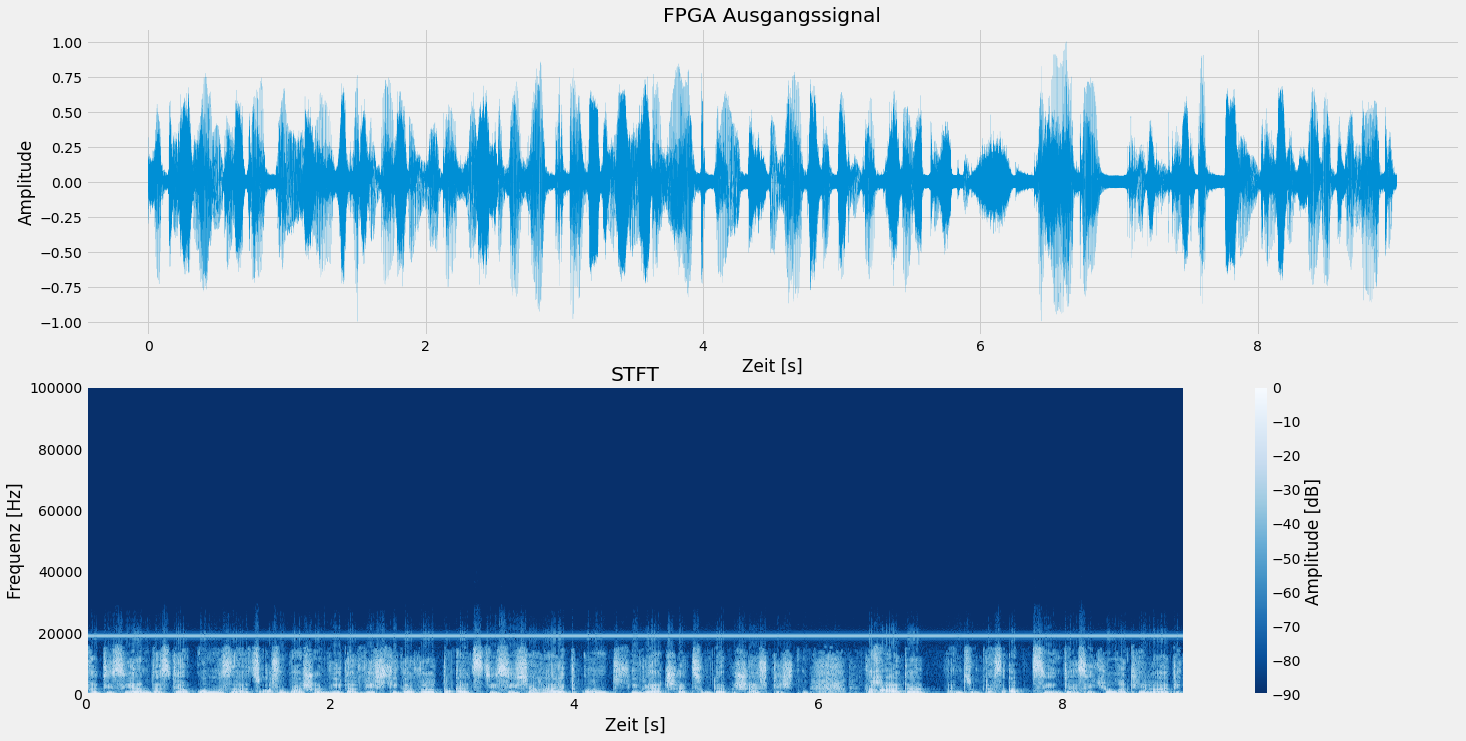

In [3]:
#Plot filtered output
f, t, Zxx = signal.stft(data_fpga/data_fpga.max(), fs=200000, nperseg=512)
plt.style.use('fivethirtyeight')
fig, [ax1, ax2] = plt.subplots(nrows = 2, figsize=(20,10))
fig.tight_layout(h_pad=2)
pc = ax2.pcolormesh(t, f, 20*np.log10(np.abs(Zxx)), vmin = -90, vmax = 0, cmap = 'Blues_r', shading='auto')
cbar = plt.colorbar(pc)
cbar.set_label('Amplitude [dB]')
ax2.set_title('STFT')
ax2.set_ylabel('Frequenz [Hz]')
ax2.set_xlabel('Zeit [s]')

ax1.plot(np.arange(len(data_fpga))/200000,np.int16(data_fpga)/data_fpga.max(), lw = '0.1')
ax1.set_title('FPGA Ausgangssignal')
ax1.set_ylabel('Amplitude')
ax1.set_xlabel('Zeit [s]')
plt.savefig('/Users/dave/Documents/FM-Demodulator/Figures/FPGA_Output.png',bbox_inches = 'tight')